In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dog_epidemic.Utils as utils
from datetime import date
import numpy as np
import shapely
from shapely import Point
from shapely import Polygon
import random
import geopandas as gp

In [2]:
nyc_dogs = pd.read_csv('NYC_Dog_Licensing_Dataset_20250202.csv', parse_dates=['AnimalBirthYear', 'LicenseIssuedDate', 'LicenseExpiredDate'])
nyc_dogs['ID'] = nyc_dogs.index

nyc_zips = gp.read_file('NYC_ZIP_CODES/geo_export_21df9e0c-f12a-46dc-ab61-8ef1dccb55c3.shp')


In [3]:
print("Unknown dog breeds:", nyc_dogs.loc[nyc_dogs['BreedName'] == "Unknown"].shape[0])
print("Name not provided:", nyc_dogs.loc[nyc_dogs['AnimalName'] == "NAME NOT PROVIDED"].shape[0])

utils.recode_missing(nyc_dogs, ['BreedName'], "Unknown")
utils.recode_missing(nyc_dogs, ['AnimalName'], "NAME NOT PROVIDED")
utils.recode_missing(nyc_dogs, ['AnimalName'], "UNKNOWN")
nyc_dogs['AnimalBirthYear'] = pd.to_numeric(nyc_dogs['AnimalBirthYear'], errors='coerce')
nyc_dogs['IssueYear'] = nyc_dogs['LicenseIssuedDate'].dt.year
nyc_dogs['ExpireYear'] = nyc_dogs['LicenseExpiredDate'].dt.year

print("Missing BreedName:", nyc_dogs[nyc_dogs['BreedName'].isnull()].shape[0])
print("Missing AnimalName:", nyc_dogs[nyc_dogs['AnimalName'].isnull()].shape[0])
print("Missing ZipCode:", nyc_dogs[nyc_dogs['ZipCode'].isnull()].shape[0])
print("Missing AnimalGender:", nyc_dogs[nyc_dogs['AnimalGender'].isnull()].shape[0])
print("Missing AnimalBirthYear:", nyc_dogs[nyc_dogs['AnimalBirthYear'].isnull()].shape[0])
print("Missing LicenseIssuedDate:", nyc_dogs[nyc_dogs['LicenseIssuedDate'].isnull()].shape[0])
print("Missing LicenseExpiredDate:", nyc_dogs[nyc_dogs['LicenseExpiredDate'].isnull()].shape[0])


Unknown dog breeds: 55254
Name not provided: 7316


/Users/emmagray/Desktop/Example Projects/Dog Epidemic/dog-epidemic/dog_epidemic/Utils.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(missing, pandas.NA, inplace=True)


Missing BreedName: 55254
Missing AnimalName: 23673
Missing ZipCode: 9
Missing AnimalGender: 21
Missing AnimalBirthYear: 30
Missing LicenseIssuedDate: 0
Missing LicenseExpiredDate: 82


In [4]:
nyc_dogs['AgeAtIssue'] = nyc_dogs.apply(utils.age_at, axis = 1, birthyear='AnimalBirthYear', year='IssueYear')
nyc_dogs['AgeAtExpire'] = nyc_dogs.apply(utils.age_at, axis = 1, birthyear='AnimalBirthYear', year='ExpireYear')


Dogs cannot have negative ages
Dogs cannot have negative ages
Dogs cannot have negative ages
Dogs cannot have negative ages
Dogs cannot have negative ages
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is implausible
Dog older than 30 years is

In [5]:
nyc_dogs

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,ID,IssueYear,ExpireYear,AgeAtIssue,AgeAtExpire
0,PAIGE,F,2014.0,American Pit Bull Mix / Pit Bull Mix,10035.0,2014-09-12,2017-09-12,2016,0,2014,2017.0,0.0,3.0
1,YOGI,M,2010.0,Boxer,10465.0,2014-09-12,2017-10-02,2016,1,2014,2017.0,4.0,7.0
2,ALI,M,2014.0,Basenji,10013.0,2014-09-12,2019-09-12,2016,2,2014,2019.0,0.0,5.0
3,QUEEN,F,2013.0,Akita Crossbreed,10013.0,2014-09-12,2017-09-12,2016,3,2014,2017.0,1.0,4.0
4,LOLA,F,2009.0,Maltese,10028.0,2014-09-12,2017-10-09,2016,4,2014,2017.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616885,SKYE,F,2016.0,Great Pyrenees,11218.0,2023-11-01,2024-12-02,2023,616885,2023,2024.0,7.0,8.0
616886,<NA>,F,2023.0,Shih Tzu Crossbreed,10022.0,2023-11-01,2024-11-01,2023,616886,2023,2024.0,0.0,1.0
616887,MUNYU,M,2009.0,"Poodle, Toy",11355.0,2023-11-01,2024-11-24,2023,616887,2023,2024.0,14.0,15.0
616888,SAINT,M,2021.0,<NA>,11412.0,2023-11-01,2024-11-01,2023,616888,2023,2024.0,2.0,3.0


In [6]:
nyc_zips['ZipCode'] = nyc_zips['modzcta'].astype('float64')

nyc_dogs_with_zip = nyc_dogs.join(nyc_zips.set_index('ZipCode'), on = 'ZipCode', how = 'left', sort = True)
nyc_dogs_with_zip.dropna(inplace=True)
nyc_dogs_with_zip.reset_index()
nyc_dogs_with_zip = gp.GeoDataFrame(nyc_dogs_with_zip)
print(nyc_dogs_with_zip['geometry'])


304       POLYGON ((-73.98774 40.74407, -73.98819 40.743...
755       POLYGON ((-73.98774 40.74407, -73.98819 40.743...
807       POLYGON ((-73.98774 40.74407, -73.98819 40.743...
880       POLYGON ((-73.98774 40.74407, -73.98819 40.743...
2067      POLYGON ((-73.98774 40.74407, -73.98819 40.743...
                                ...                        
605167    POLYGON ((-73.86289 40.57606, -73.86281 40.575...
607055    POLYGON ((-73.86289 40.57606, -73.86281 40.575...
610032    POLYGON ((-73.86289 40.57606, -73.86281 40.575...
610474    POLYGON ((-73.86289 40.57606, -73.86281 40.575...
611501    POLYGON ((-73.86289 40.57606, -73.86281 40.575...
Name: geometry, Length: 531792, dtype: geometry


In [7]:

nyc_dogs_with_zip['locations'] = pd.DataFrame(nyc_dogs_with_zip.apply(utils.pick_location, axis=1, shape='geometry'))


<Axes: >

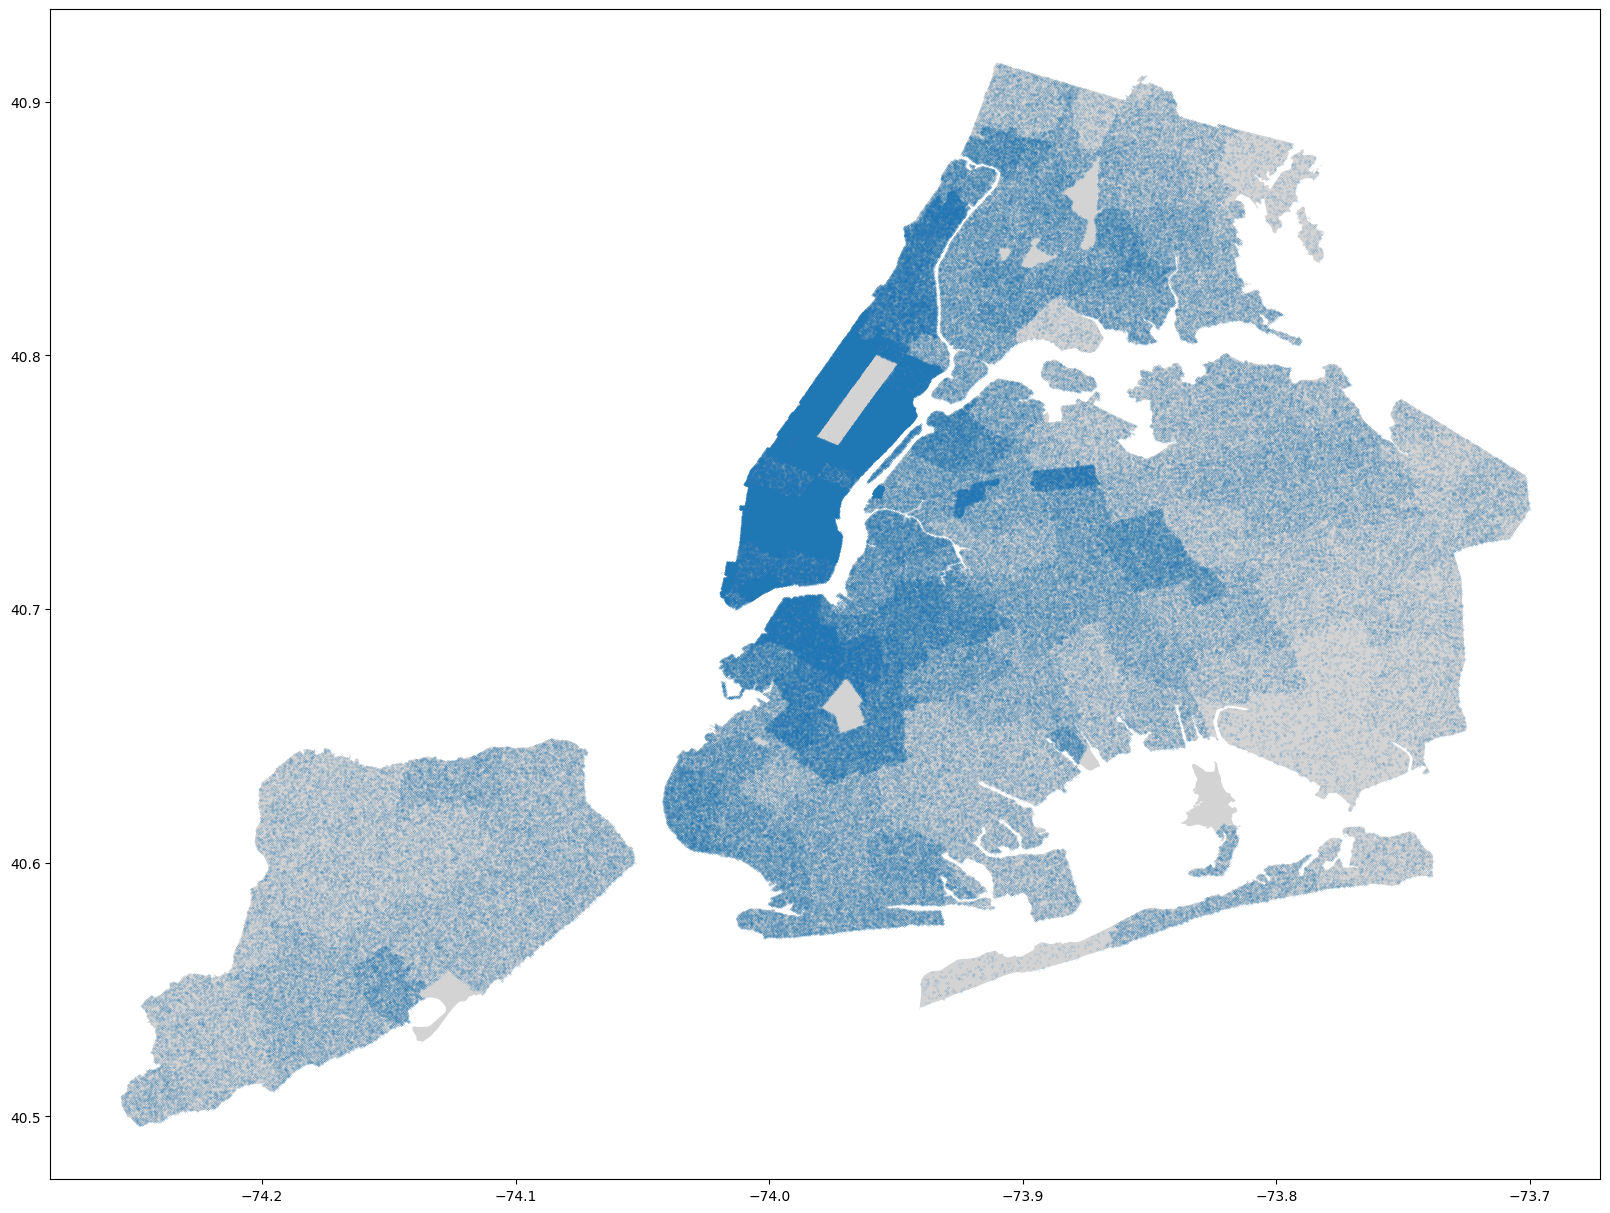

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
nyc_zips['geometry'].plot(ax = ax, color = 'lightgray')
nyc_dogs_with_zip['locations'].plot(ax = ax, markersize = 0.01)

In [12]:
# Save data
nyc_dogs_with_zip.to_parquet('AllNYCDogs.parquet')
